## **IMPORTING NECESSARY MODULES**

In [295]:
!pip install tensorflow



[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [296]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [297]:
#!pip install rpy2

## **IMPORTING DATA**

In [298]:
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('Datasets/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [299]:
print('the size of the dataset', data.shape)
print('the columns of the dataset ', list(data.columns))

the size of the dataset (2938, 22)
the columns of the dataset  ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [300]:
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [301]:
print('Number of Countries', len(data['Country'].unique()))

Number of Countries 193


In [302]:
data.shape

(2938, 22)

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [304]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [305]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [306]:
#Count of developing and developed countries
data.groupby('Status')["Status"].count()

Status
Developed      512
Developing    2426
Name: Status, dtype: int64

In [307]:
data.loc[:, ["Life_Expectancy", "Alcohol"]].groupby(data['Country']).describe().loc[['Morocco','Germany','France','Spain'],:]

Life_Expectancy                                                   \
                  count      mean       std   min     25%    50%     75%   
Country                                                                    
Morocco            16.0  72.15625  2.243797  68.6  70.725  72.15  73.675   
Germany            16.0  81.17500  3.379053  78.0  78.950  79.85  82.000   
France             16.0  82.21875  3.166958  78.8  80.575  81.60  82.250   
Spain              16.0  82.06875  2.792065  79.1  80.625  81.75  82.450   

              Alcohol                                                           
          max   count       mean       std    min    25%    50%     75%    max  
Country                                                                         
Morocco  77.0    15.0   0.518667  0.060340   0.43   0.46   0.54   0.560   0.62  
Germany  89.0    15.0  11.628667  0.568241  10.94  11.20  11.50  11.875  12.91  
France   89.0    15.0  12.404667  0.936695  11.10  11.75  12.20  13.335  13.89  
Spain    89.0    15.0  10.024000  2.974496   0.01   9.70  10.24  11.890  12.26

In [308]:
#calculating the null values for each column
data.isna().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

## **DATA VISUALIZATION**

<AxesSubplot: >

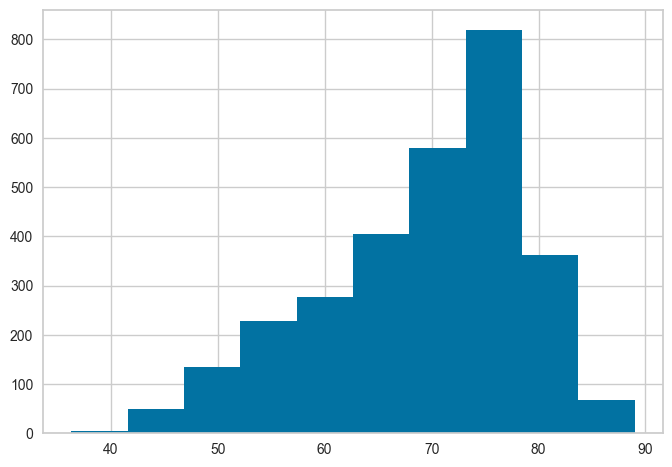

In [309]:
#Distribution of the response variable
data['Life_Expectancy'].hist()

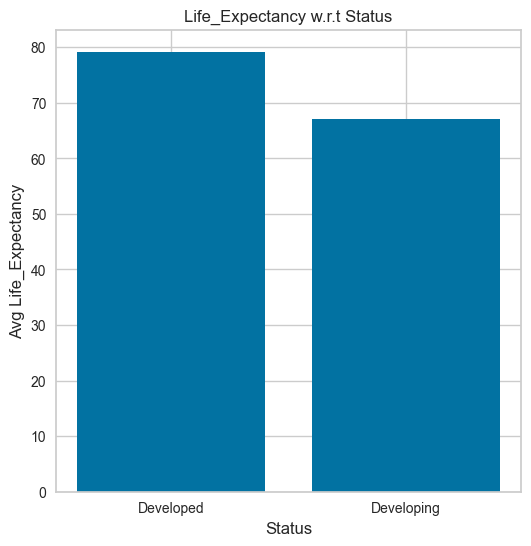

In [310]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index, data.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

<AxesSubplot: title={'center': 'Life_Expectancy'}, xlabel='Country'>

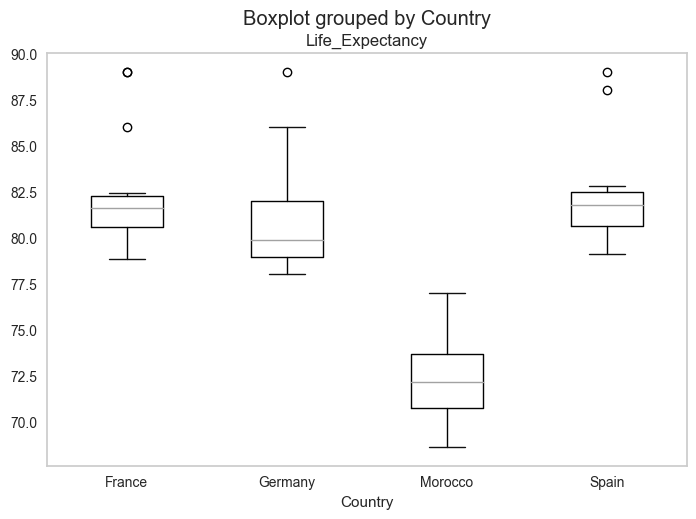

In [311]:
data[data.Country.isin(['Morocco','Germany','Spain','France'])].boxplot(by='Country', 
                       column=['Life_Expectancy'], 
                       grid=False)

<AxesSubplot: ylabel='Country'>

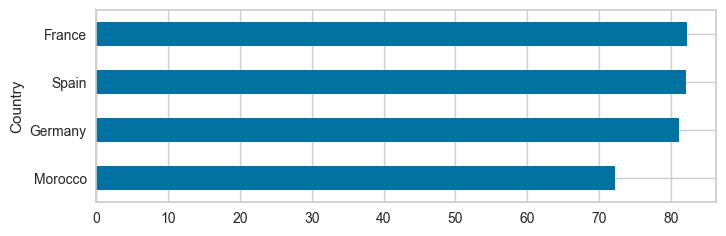

In [312]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
data[data.Country.isin(['Morocco','Germany','Spain','France'])].groupby('Country')['Life_Expectancy'].mean().sort_values().plot(kind='barh', ax=ax1)

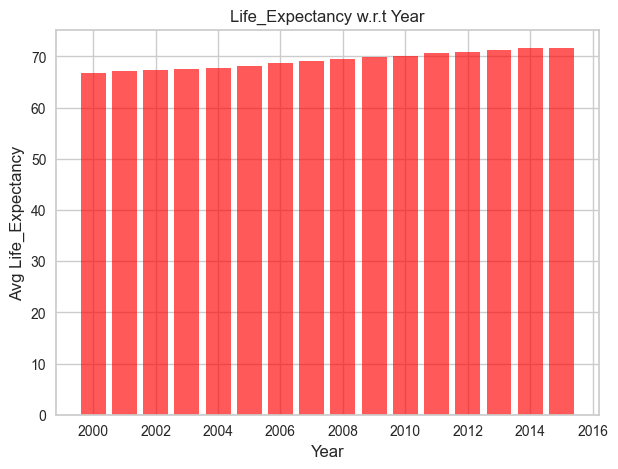

In [313]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index, data.groupby('Year')['Life_Expectancy'].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

C:\Users\18572\AppData\Local\Temp\ipykernel_25088\4045638767.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = data.corr()


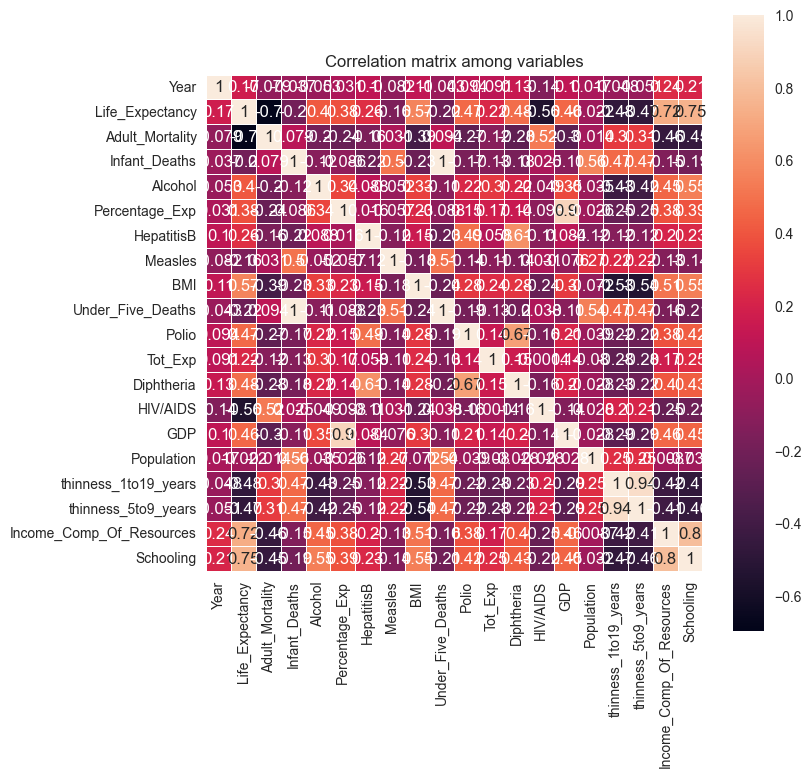

In [314]:
# Using heatmap to observe correlations.
cormat = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

# **Observation**
* **LifeExpectancy has a negative correlation with adult mortality** 
* **LifeExpectancy has strong correlatios with Schooling and Income composition of resources** 
* **Strong correlation between thinness_1to19_years and thinness_5to9_years** 
* **There is a non-negligible correlation between LifeExpectancy and BMI and body deseases** 

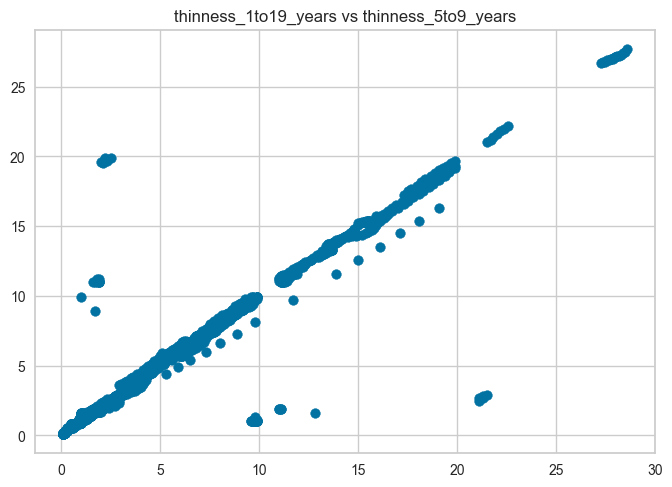

In [315]:
plt.scatter(data["thinness_5to9_years"], data["thinness_1to19_years"])
plt.title("thinness_1to19_years vs thinness_5to9_years")
plt.show()

In [316]:
#Strong correlation between "thinness_1to19_years" and "thinness_5to9_years"
data = data.drop(['thinness_5to9_years'], axis=1)

## **DEALING WITH MISSING DATA**

In [317]:
data.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [318]:
# percentage of null values in each column.
data.isnull().sum()*100/data.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [319]:
country_list = data.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB',
             'BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','Income_Comp_Of_Resources','Schooling']

In [320]:
# Treat null values using interpolation.
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()

In [321]:
#Droping rows with null target variable
data[np.isnan(data['Life_Expectancy'])]
data = data.drop(data.index[[624, 769, 1650,1715,1812,1909,1958,2167,2216,2713]])

In [322]:
def impute_col(row, col): #MCAR
    mean_col = pd.DataFrame({'mean_col':pd.Series(np.round(data.groupby('Country')[col].mean(), 2))})
    if np.isnan(row[col]):
        cnt = row['Country']
        row[col] = mean_col.loc[cnt][0]
    return row

In [323]:
# Alcohol null values
data[np.isnan(data.Alcohol)]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Income_Comp_Of_Resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,9,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,54.9,1,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,62.1,10,87.0,NaN,87.0,0.1,NaN,NaN,1.6,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,17.5,35,97.0,NaN,97.0,0.1,NaN,NaN,14.2,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,23.4,40,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,0.576,12.5


In [324]:
data = data.apply(impute_col, args=('Alcohol',) , axis=1)
data = data[data.Country != 'South Sudan']

In [325]:
# Hepatitis B null values
data[np.isnan(data['HepatitisB'])]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Income_Comp_Of_Resources,Schooling
737,Denmark,2015,Developed,86.0,71.0,0,10.71,0.000000,NaN,9,58.8,0,93.0,NaN,93.0,0.1,5314.64416,5683483.0,1.1,0.923,19.2
738,Denmark,2014,Developed,84.0,73.0,0,9.64,10468.762920,NaN,27,58.4,0,94.0,1.80,94.0,0.1,62425.53920,5643475.0,1.1,0.926,19.2
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,NaN,17,58.1,0,94.0,11.25,94.0,0.1,61191.19263,5614932.0,1.1,0.924,18.7
740,Denmark,2012,Developed,80.0,76.0,0,9.26,928.417079,NaN,2,57.7,0,94.0,1.98,94.0,0.1,5857.52100,5591572.0,1.1,0.922,18.4
741,Denmark,2011,Developed,79.7,79.0,0,10.47,10251.108720,NaN,84,57.4,0,91.0,1.87,91.0,0.1,61753.66700,557572.0,1.1,0.910,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,United Kingdom of Great Britain and Northern I...,2004,Developed,78.8,83.0,4,12.22,0.000000,NaN,189,6.1,4,92.0,7.98,92.0,0.1,NaN,NaN,0.7,NaN,NaN
2774,United Kingdom of Great Britain and Northern I...,2003,Developed,78.3,86.0,4,11.85,0.000000,NaN,460,59.5,4,91.0,7.81,91.0,0.1,NaN,NaN,0.7,NaN,NaN
2775,United Kingdom of Great Britain and Northern I...,2002,Developed,78.2,87.0,4,11.44,0.000000,NaN,314,58.8,4,91.0,7.57,91.0,0.1,NaN,NaN,0.7,NaN,NaN
2776,United Kingdom of Great Britain and Northern I...,2001,Developed,78.0,88.0,4,10.91,0.000000,NaN,73,58.2,4,91.0,7.31,91.0,0.1,NaN,NaN,0.7,NaN,NaN


In [326]:
data = data.drop(['HepatitisB'], axis=1)

In [327]:
#BMI null values
data[np.isnan(data['BMI'])]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Income_Comp_Of_Resources,Schooling
2457,Sudan,2015,Developing,64.1,225.0,58,1.46,0.000000,3585,NaN,85,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,676,NaN,86,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,2813,NaN,88,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.01,220.522192,8523,NaN,89,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.12,196.689215,5616,NaN,91,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,0.463,7.0
2462,Sudan,2010,Developing,62.5,243.0,62,1.77,172.009788,680,NaN,92,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,0.461,7.0
2463,Sudan,2009,Developing,62.0,248.0,63,1.99,17.053693,68,NaN,94,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,0.456,6.8
2464,Sudan,2008,Developing,61.8,251.0,64,2.01,128.636271,129,NaN,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,0.444,6.3
2465,Sudan,2007,Developing,61.4,254.0,65,2.01,86.131669,327,NaN,97,84.0,4.72,84.0,0.3,1115.695200,32282526.0,NaN,0.440,6.4
2466,Sudan,2006,Developing,61.0,26.0,66,1.90,60.336857,228,NaN,99,77.0,3.93,78.0,0.2,893.879364,316764.0,NaN,0.430,6.2


In [328]:
data = data[data.Country != 'Sudan']

In [329]:
#Total expenditure null values
data = data.apply(impute_col, args=('Tot_Exp',) , axis=1)

In [330]:
data = data[~data['Country'].isin(["Democratic People's Republic of Korea","Somalia"])]

In [331]:
#GDP null values
data = data.apply(impute_col, args=('GDP',) , axis=1)
data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8


In [332]:
data = data.drop(['GDP'], axis=1)

In [333]:
#Population null values
data = data.apply(impute_col, args=('Population',) , axis=1)

In [334]:
data[np.isnan(data.Population)]['Country'].unique()

array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Congo', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Grenada',
       'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [335]:
data = data.drop(['Population'], axis=1)

In [336]:
#Income_Comp_Of_Resources
data = data.apply(impute_col, args=('Income_Comp_Of_Resources',) , axis=1)

In [337]:
data = data.drop(['Income_Comp_Of_Resources'], axis=1)

In [338]:
#Schooling
data = data.apply(impute_col, args=('Schooling',) , axis=1)
data = data.drop(['Schooling'], axis=1)

In [339]:
data.isnull().sum()

Country                 0
Year                    0
Status                  0
Life_Expectancy         0
Adult_Mortality         0
Infant_Deaths           0
Alcohol                 0
Percentage_Exp          0
Measles                 0
BMI                     0
Under_Five_Deaths       0
Polio                   0
Tot_Exp                 0
Diphtheria              0
HIV/AIDS                0
thinness_1to19_years    0
dtype: int64

# **OUTLIERS**

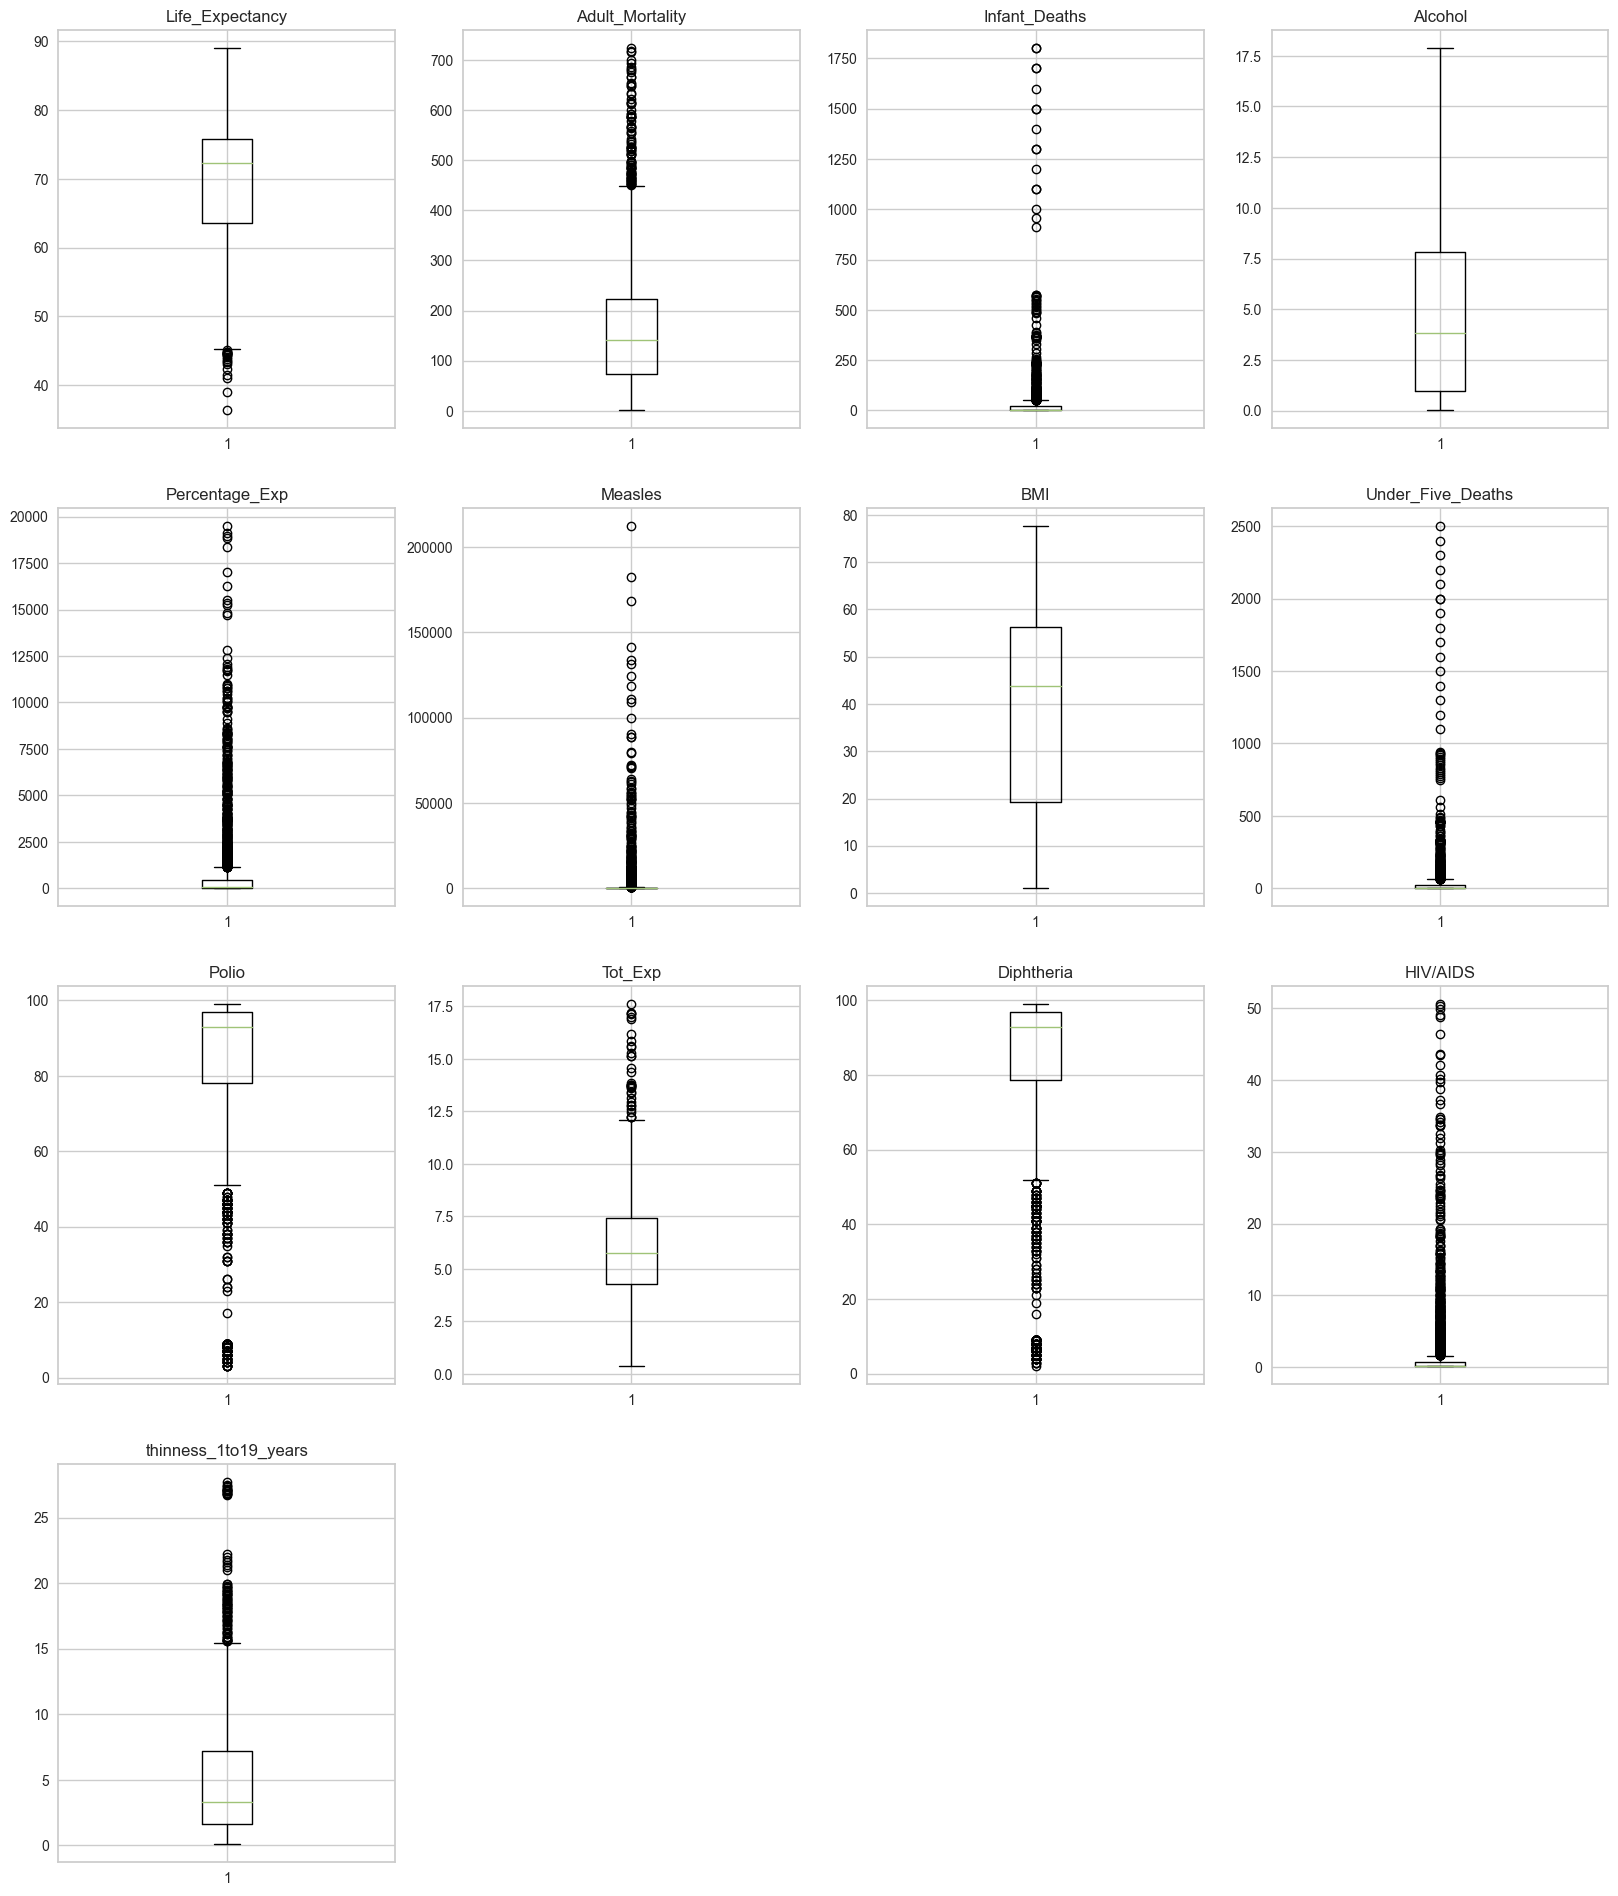

In [340]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1, 'Adult_Mortality':2,
            'Infant_Deaths':3, 'Alcohol':4,
            'Percentage_Exp':5,'Measles':6,
            'BMI':7,'Under_Five_Deaths':8,
            'Polio':9,'Tot_Exp':10,
            'Diphtheria':11,'HIV/AIDS':12,
            'thinness_1to19_years':13}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable])
                     plt.title(variable)

plt.show()

In [341]:
data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,thinness_1to19_years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2


# **FEATURE SELECTION**

In [342]:
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','Life_Expectancy'],data.loc[data['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=29.36614038467105, pvalue=6.43229833545797e-166)

**p value is < 0.05
Therefore, the difference of Life Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature.**

**Also "Adult mortality" : -0.7, "HIV/AIDS" : -0.56,  "BMI" : 0.57, "Polio" : 0.47, "GDP" : 0.46, "Alcohol" : 0.4, "thinness_1to19_years" : 0.45**

# **FEATURE ENGINEERING**

* **DUMMIFICATION OF STATUS**
* **NORMALIZING NUMERICAL FEATURES**

In [343]:
feature_df = data[['Country','Status','Adult_Mortality','Alcohol','HIV/AIDS','Polio','BMI', 'thinness_1to19_years','Life_Expectancy']]

In [344]:
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)

In [345]:
final['Adult_Mortality_scaled'] =final['Adult_Mortality'].apply(lambda x : ((x-np.min(final['Adult_Mortality']))/(np.max(final['Adult_Mortality'])-np.min(final['Adult_Mortality'])) * (20)))

In [346]:
final['Polio_scaled'] =final['Polio'].apply(lambda x : ((x-np.min(final['Polio']))/(np.max(final['Polio'])-np.min(final['Polio'])) * (20)))

In [347]:
final.to_csv('./Datasets/final.csv',index = False) 

In [348]:
final = pd.read_csv('./Datasets/final.csv')

In [349]:
final.head()

,Country,Adult_Mortality,Alcohol,HIV/AIDS,Polio,BMI,thinness_1to19_years,Life_Expectancy,Developing,Adult_Mortality_scaled,Polio_scaled
0,Afghanistan,263.0,0.01,0.1,6.0,19.1,17.2,65.0,1,7.257618,0.625000
1,Afghanistan,271.0,0.01,0.1,58.0,18.6,17.5,59.9,1,7.479224,11.458333
2,Afghanistan,268.0,0.01,0.1,62.0,18.1,17.7,59.9,1,7.396122,12.291667
3,Afghanistan,272.0,0.01,0.1,67.0,17.6,17.9,59.5,1,7.506925,13.333333
4,Afghanistan,275.0,0.01,0.1,68.0,17.2,18.2,59.2,1,7.590028,13.541667


# **EMBED THE COUNTRY FEATURE**

In [350]:
countries = final.Country.unique()
country_dict = {'countries': list(countries)}
country_df = pd.DataFrame(country_dict)

In [351]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(country_dict).numpy()

The function first creates a dense feature layer using the layers.DenseFeatures method from TensorFlow, which takes the feature column as input and returns a dense layer that can be applied to input data. The feature_layer variable stores this dense layer.

The function then applies the feature_layer to the country_dict using the numpy() method, which converts the output of the layer to a NumPy array. The resulting array contains the values of the features in the feature column for the country data in country_dict.

Overall, this function allows for the transformation of raw country data into a format that can be input to a machine learning model using a feature column, which is a common technique for preprocessing and transforming data in TensorFlow.

In [352]:
countries = feature_column.categorical_column_with_vocabulary_list(
 'countries', country_df['countries'])

In [353]:
countries_embedding = feature_column.embedding_column(countries, dimension=4)

In [354]:
countries_embedding =  demo(countries_embedding)

In [355]:
b = []
for embed in countries_embedding:
    b.extend([embed] * 16)

In [356]:
final['countries_embedding'] = pd.Series(b)

In [357]:
final['sum_countries_embedding'] = final['countries_embedding'].apply(lambda x: x.sum())

In [358]:
final =  final.rename(columns={"HIV/AIDS": "hivaids"})

In [359]:
feature_df = ['sum_countries_embedding','Adult_Mortality_scaled','Alcohol','hivaids','Polio_scaled','BMI', 'thinness_1to19_years','Developing']

In [360]:
final

,Country,Adult_Mortality,Alcohol,hivaids,Polio,BMI,thinness_1to19_years,Life_Expectancy,Developing,Adult_Mortality_scaled,Polio_scaled,countries_embedding,sum_countries_embedding
0,Afghanistan,263.0,0.01,0.1,6.0,19.1,17.2,65.0,1,7.257618,0.625000,"[-0.6389375, -0.27401692, -0.5835872, -0.02405...",-1.520601
1,Afghanistan,271.0,0.01,0.1,58.0,18.6,17.5,59.9,1,7.479224,11.458333,"[-0.6389375, -0.27401692, -0.5835872, -0.02405...",-1.520601
2,Afghanistan,268.0,0.01,0.1,62.0,18.1,17.7,59.9,1,7.396122,12.291667,"[-0.6389375, -0.27401692, -0.5835872, -0.02405...",-1.520601
3,Afghanistan,272.0,0.01,0.1,67.0,17.6,17.9,59.5,1,7.506925,13.333333,"[-0.6389375, -0.27401692, -0.5835872, -0.02405...",-1.520601
4,Afghanistan,275.0,0.01,0.1,68.0,17.2,18.2,59.2,1,7.590028,13.541667,"[-0.6389375, -0.27401692, -0.5835872, -0.02405...",-1.520601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Zimbabwe,723.0,4.36,33.6,67.0,27.1,9.4,44.3,1,20.000000,13.333333,"[-0.3882987, 0.33658952, 0.6675983, 0.41566628]",1.031555
2860,Zimbabwe,715.0,4.06,36.7,7.0,26.7,9.8,44.5,1,19.778393,0.833333,"[-0.3882987, 0.33658952, 0.6675983, 0.41566628]",1.031555
2861,Zimbabwe,73.0,4.43,39.8,73.0,26.3,1.2,44.8,1,1.994460,14.583333,"[-0.3882987, 0.33658952, 0.6675983, 0.41566628]",1.031555
2862,Zimbabwe,686.0,1.72,42.1,76.0,25.9,1.6,45.3,1,18.975069,15.208333,"[-0.3882987, 0.33658952, 0.6675983, 0.41566628]",1.031555


# **TRAINING**

In [361]:
# split the data into training and testing sets
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# df = pd.read_csv('Life Expectancy Data.csv')
X = final.loc[:,feature_df]
y = final.Life_Expectancy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train and evaluate linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# train and evaluate mixed effects model
# (assuming the data has a nested structure with country as a random effect)
mixed_model = smf.mixedlm("Life_Expectancy ~ Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing", 
                 final, 
                 groups=final["sum_countries_embedding"], re_formula="~Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing") 
mixed_results = mixed_model.fit()
mixed_pred = mixed_results.predict(X_test)
mixed_mse = mean_squared_error(y_test, mixed_pred)

# train and evaluate neural network model
nn = MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam", max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_pred)

# print the MSE for each model
print("Linear Regression MSE:", lr_mse)
print("Mixed Effects Model MSE:", mixed_mse)
print("Neural Network MSE:", nn_mse)


c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base

Linear Regression MSE: 25.240714397076474
Mixed Effects Model MSE: 75.1987354791888
Neural Network MSE: 8.7678481126868


## **LINEAR REGRESSION**

In [362]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x = final.loc[:,feature_df]
y = final.Life_Expectancy
model.fit(x, y)

LinearRegression()

In [363]:
print("Model slopes:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slopes:     [-0.22418513 -0.92833097  0.20756191 -0.48332782  0.37734302  0.09429839
 -0.17747715 -3.6981524 ]
Model intercept: 67.50140812517695


In [364]:
y_predict = model.predict(x.values)
RMSE = np.sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Method,RMSE
0,Linear Regression,4.94239


In [365]:
np.min(final['Life_Expectancy']), np.max(final['Life_Expectancy'])

(36.3, 89.0)

In [366]:
!pip install yellowbrick



[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


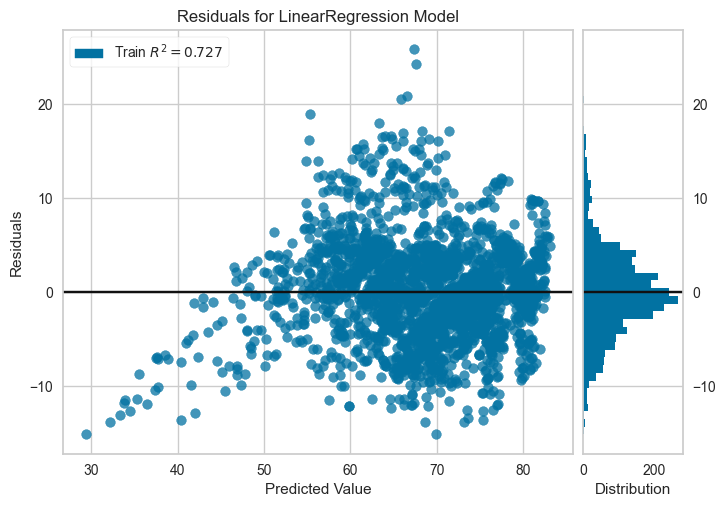

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [367]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(estimator = model)
visualizer.fit(x, y) 
visualizer.poof()

**Residuals should be pretty symmetrically distributed, tending to cluster towards the middle of the plot. Clustered around the lower single digits of the y-axis.
In general, no clear patterns.**

## **MIXED EFFECT MODEL**

In [368]:
!pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [369]:
#!pip install -q statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("Life_Expectancy ~ Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing", 
                 final, 
                 groups=final["sum_countries_embedding"], re_formula="~Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing") 
#re_formula To ensure that each country has its own random slope

The model is specified using the formula Life_Expectancy ~ Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing, which indicates that Life_Expectancy is the dependent variable and the other variables listed are the independent variables.

The final argument is the data frame containing the variables used in the model.

The groups argument specifies that the model should account for variation across different groups of data points, with each group defined by the sum_countries_embedding variable in the data frame. This is a way of specifying that the data are clustered or nested within different countries, and that the model should account for this nesting when estimating the model parameters.

The re_formula argument specifies that each country should have its own random slope for the independent variables listed in the formula (Adult_Mortality_scaled, Alcohol, Polio_scaled, hivaids, BMI, thinness_1to19_years, and Developing). This means that the effect of these variables on Life_Expectancy may vary across different countries, and the model should account for this variation by estimating separate slopes for each country.

Overall, this code is creating a mixed effects model that accounts for both fixed and random effects in the data, allowing for more accurate and robust estimates of the relationship between the independent variables and the dependent variable.

In [370]:
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 630.683943
  warnings.warn(msg, ConvergenceWarning)


                             Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            Life_Expectancy
No. Observations:              2864               Method:                        REML           
No. Groups:                    179                Scale:                         2.8842         
Min. group size:               16                 Log-Likelihood:                -7072.2854     
Max. group size:               16                 Converged:                     No             
Mean group size:               16.0                                                             
------------------------------------------------------------------------------------------------
                                                   Coef.   Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------------------------
Intercept                                          79.581   

c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\18572\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2705: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


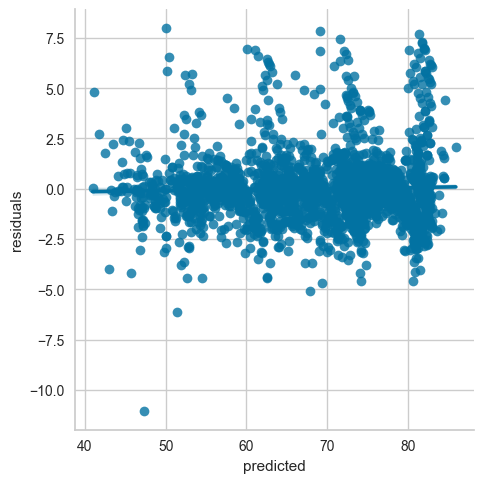

In [371]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["predicted"] = mdf.fittedvalues

sns.lmplot(x = "predicted", y = "residuals", data = performance)

In [372]:
y_predict = mdf.fittedvalues
RMSE = np.sqrt(((y-y_predict)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

,Method,RMSE
0,Linear Regression,4.942390
3,Mixed_Random_Slopes,1.556047


# **USING A NEURAL NETWORK**

In [373]:
final = pd.read_csv('./final.csv')

In [374]:
final.head()

,Country,Adult_Mortality,Alcohol,HIV/AIDS,Polio,BMI,thinness_1to19_years,Life_Expectancy,Developing,Adult_Mortality_scaled,Polio_scaled
0,Afghanistan,263.0,0.01,0.1,6.0,19.1,17.2,65.0,1,7.257618,0.625000
1,Afghanistan,271.0,0.01,0.1,58.0,18.6,17.5,59.9,1,7.479224,11.458333
2,Afghanistan,268.0,0.01,0.1,62.0,18.1,17.7,59.9,1,7.396122,12.291667
3,Afghanistan,272.0,0.01,0.1,67.0,17.6,17.9,59.5,1,7.506925,13.333333
4,Afghanistan,275.0,0.01,0.1,68.0,17.2,18.2,59.2,1,7.590028,13.541667


In [375]:
final['Status'] = final['Developing'].map(lambda x: 'Developing' if x==1 else 'Developed')

In [376]:
train, test = train_test_split(final, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

1832 train examples
459 validation examples
573 test examples


In [377]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Life_Expectancy')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [378]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=16)
test_ds = df_to_dataset(test, shuffle=False, batch_size=16)

In [379]:
final_batch = next(iter(train_ds))[0]

In [380]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(final_batch).numpy()

In [381]:
feature_columns = []
# numeric cols
for header in ['Alcohol', 'HIV/AIDS', 'Polio_scaled','BMI','thinness_1to19_years']:
    feature_columns.append(feature_column.numeric_column(header))

In [382]:
#catgorical cols
status = feature_column.categorical_column_with_vocabulary_list(
      'Status', ['Developing', 'Developed'])

status = feature_column.indicator_column(status)
feature_columns.append(status)

In [383]:
# embedding columns
country = feature_column.categorical_column_with_vocabulary_list(
      'Country', final.Country.unique())
country_embedding = feature_column.embedding_column(country, dimension=6)
feature_columns.append(country_embedding)

In [384]:
#Input layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
#Model architecture
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'), 
  layers.Dense(16, activation='relu'), 
  layers.Dense(1)
])
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [385]:
#Fitting
history = model.fit(train_ds, validation_data=val_ds, epochs=40)

Epoch 1/40
58/58 [==============================] - 1s 7ms/step - loss: 4198.8359 - root_mean_squared_error: 64.7984 - val_loss: 1166.7410 - val_root_mean_squared_error: 34.1576
Epoch 2/40
58/58 [==============================] - 0s 4ms/step - loss: 372.4349 - root_mean_squared_error: 19.2986 - val_loss: 121.7711 - val_root_mean_squared_error: 11.0350
Epoch 3/40
58/58 [==============================] - 0s 4ms/step - loss: 127.0235 - root_mean_squared_error: 11.2705 - val_loss: 73.3959 - val_root_mean_squared_error: 8.5671
Epoch 4/40
58/58 [==============================] - 0s 3ms/step - loss: 86.3344 - root_mean_squared_error: 9.2916 - val_loss: 56.9567 - val_root_mean_squared_error: 7.5470
Epoch 5/40
58/58 [==============================] - 0s 4ms/step - loss: 65.4593 - root_mean_squared_error: 8.0907 - val_loss: 47.2942 - val_root_mean_squared_error: 6.8771
Epoch 6/40
58/58 [==============================] - 0s 3ms/step - loss: 53.2237 - root_mean_squared_error: 7.2955 - val_loss: 42

In [386]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,epoch
35,5.972249,2.443819,9.352358,3.058162,35
36,5.748009,2.397501,10.405292,3.225724,36
37,5.752517,2.398441,9.231372,3.038317,37
38,5.878149,2.424489,9.063789,3.010613,38
39,5.653904,2.377794,9.303910,3.050231,39


In [387]:
predictions = model.predict(test_ds)
y = np.concatenate([y for x, y in test_ds], axis=0)

36/36 [==============================] - 0s 3ms/step


In [388]:
compare = pd.DataFrame({'predictions':predictions.reshape((-1,)), 'True': y})
compare.tail()

,predictions,True
568,72.325371,71.3
569,72.091148,72.4
570,73.954247,75.2
571,76.070648,74.2
572,76.815582,77.0


In [389]:
model_err = model.evaluate(test_ds)

36/36 [==============================] - 0s 3ms/step - loss: 8.3989 - root_mean_squared_error: 2.8981


## **IN THIS PARTICULAR CASE, THE MIXED EFFECT MODEL IS SUPERIOR TO BOTH NORMAL LINEAR REGRESSION AND THE USED NEURAL NETWORK ARCHITECTURE, SINCE IT TAKES INTO ACCOUNT THE DEPENDANCE OF THE DATA.**

In [390]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Select predictor variables and target variable
X = data[['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
          'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
          'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
          ' thinness  1-19 years', ' thinness 5-9 years',
          'Income composition of resources', 'Schooling']]
y = data['Life expectancy ']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit decision tree model
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict on test data
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

KeyError: "['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] not in index"